Reto N° 3 Maria Camila Bacca

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0. Se carga las librerías

In [3]:
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Se carga los archivos

In [ ]:
nxl='/content/drive/MyDrive/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100) #Mostrar las primerar 100 filas

XDB=XDB[['Age', 'Income', 'Hours', 'Enroll']]
sns.pairplot(XDB, hue='Enroll',size=4,vars=['Age', 'Income', 'Hours'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:3])  #Variables de entrada; Edad, Ingresos, Egresos, Monto (EAD)
yd=np.array(XDB.iloc[:,3])    #Preapr

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


2. Implementación modelo KNN

Esta es la matriz de confusion:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
El modelo me presta para la persona : [0]


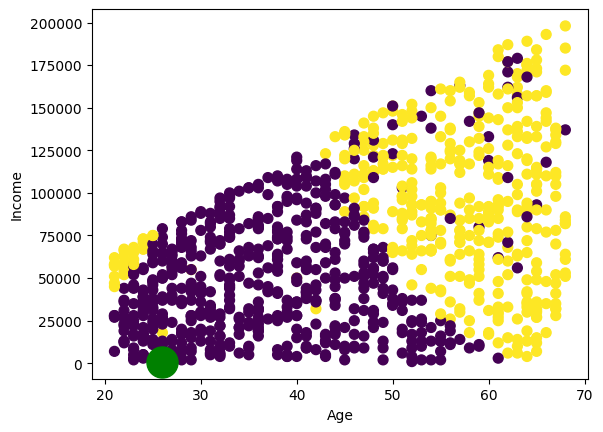

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)   #Tomar 10 vecinos
mknn.fit(XD,yd)                             #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)

#Model me vas a prestar o no
XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("El modelo me presta para la persona :",ydpp)

#Las graficas se hacen con las variables que tienen mas correlacion
plt.scatter(XD[:,0],XD[:,1],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=500,facecolors='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

3. Construcción del K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedo el primer solicitante 3
Donde quedo el segundo solicitante 3
Donde quedo el tercer solicitante 1


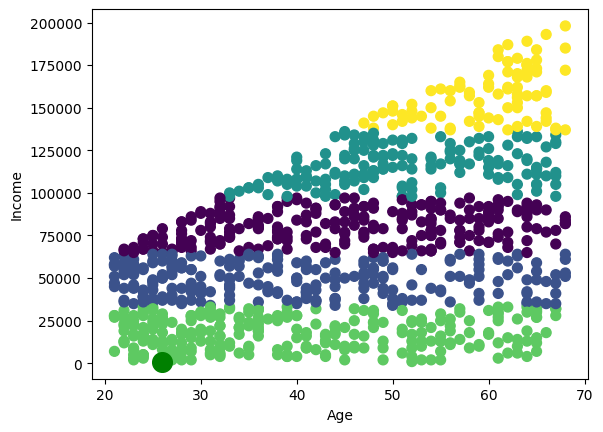

El modelo me presta: [0]
Total de peronas del cluster 0: 246
Negados para el Cluster 0 es: 0.5284552845528455
Aprobados para el Cluster 0 es: 0.4715447154471545
Total de peronas del cluster 1: 238
Negados para el Cluster 1 es: 0.7226890756302521
Aprobados para el Cluster 1 es: 0.2773109243697479
Total de peronas del cluster 2: 157
Negados para el Cluster 2 es: 0.3184713375796178
Aprobados para el Cluster 2 es: 0.6815286624203821
Total de peronas del cluster 3: 271
Negados para el Cluster 3 es: 0.8487084870848709
Aprobados para el Cluster 3 es: 0.15129151291512916
Total de peronas del cluster 4: 88
Negados para el Cluster 4 es: 0.17045454545454544
Aprobados para el Cluster 4 es: 0.8295454545454546
Caracteristicas sociodemograficas de cada cluster:
 [[4.48577236e+01 8.01463415e+04 1.03333333e+01]
 [3.97478992e+01 4.93655462e+04 1.02815126e+01]
 [5.12611465e+01 1.15770701e+05 9.80891720e+00]
 [3.96900369e+01 1.77601476e+04 1.01881919e+01]
 [6.00340909e+01 1.57795455e+05 1.01363636e+01]]


In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo

mkm=KMeans(n_clusters=5,init='random', random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_ #Donde quedaron clasificados cada uno de los solicitantes
print("Donde quedo el primer solicitante",labels[0])
print("Donde quedo el segundo solicitante",labels[1])
print("Donde quedo el tercer solicitante",labels[2])

plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=200,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

#Modelo me vas a prestar o no
XDP=np.array([[26,800,15]])
ydpp2=mknn.predict(XDP)
print("El modelo me presta:",ydpp2)

#Cual es el porcentaje de preaprobados y negados del cluster 0
c00 = len(np.where((labels==0) & (yd==0))[0])
c01 = len(np.where((labels==0) & (yd==1))[0])
c00+c01
print('Total de peronas del cluster 0:', c00+c01)
print("Negados para el Cluster 0 es:", c00/(c00+c01))
print("Aprobados para el Cluster 0 es:", c01/(c00+c01))

#Cual es el porcentaje de preaprobados y negados del cluster 1
c10 = len(np.where((labels==1) & (yd==0))[0])
c11 = len(np.where((labels==1) & (yd==1))[0])
c10+c11
print('Total de peronas del cluster 1:', c10+c11)
print("Negados para el Cluster 1 es:", c10/(c10+c11))
print("Aprobados para el Cluster 1 es:", c11/(c10+c11))

#Cual es el porcentaje de aprobados y negados del cluster 2
c20 = len(np.where((labels==2) & (yd==0))[0])
c21 = len(np.where((labels==2) & (yd==1))[0]) # Calculate c21 before using it
c20+c21
print('Total de peronas del cluster 2:', c20+c21)
print("Negados para el Cluster 2 es:", c20/(c20+c21))
print("Aprobados para el Cluster 2 es:", c21/(c20+c21))

#Cual es el porcentaje de aprobados y negados del cluster 3
c30 = len(np.where((labels==3) & (yd==0))[0])
c31 = len(np.where((labels==3) & (yd==1))[0])
c30+c31
print('Total de peronas del cluster 3:', c30+c31)
print("Negados para el Cluster 3 es:", c30/(c30+c31))
print("Aprobados para el Cluster 3 es:", c31/(c30+c31))

#Cual es el porcentaje de aprobados y negados del cluster 4
c40 = len(np.where((labels==4) & (yd==0))[0])
c41 = len(np.where((labels==4) & (yd==1))[0])
c40+c41
print('Total de peronas del cluster 4:', c40+c41)
print("Negados para el Cluster 4 es:", c40/(c40+c41))
print("Aprobados para el Cluster 4 es:", c41/(c40+c41))

#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_
print("Caracteristicas sociodemograficas de cada cluster:\n",clusters)

Análisis:

- Las variables que hacen parte de la base de datos es: Age, Income, Hours and Enroll.
- La variable que mejor lleva a cabo el proceso de caracterización es la Edad.
- Las variables que tiene correlación es Age y Enroll.
- El comportamiento del modelo KNN es:
      - Exactitud:79.6%, lo que refleja una alta precisión general.
      - Sensibilidad: 64%, lo que significa que identifica correctamente un porcentaje moderado de personas que se inscriben.
      - Especificidad: 90.1%, indicando un buen desempeño para identificar personas que no se inscriben.

- En el modelo KNN, la persona no va a comprar la membresía. En el modelo K-Means es 26,800,15. En el modelo K-Means, esta persona pertenece al cluster 3, que tiene características similares en términos de edad e ingresos bajos, donde la mayoría de personas no se inscriben.
- El modelo K-Means agrupa a los individuos en 5 clusters. Los grupos están  diferenciados en edad, ingresos y enroll. Cada cluster tiene patrones específicos que permiten identificar diferentes perfiles de clientes.
-
 -Cluster 0: 246 personas, con 47.15% inscritos.
 -Cluster 1: 238 personas, con 27.73% inscritos.
 -Cluster 2: 157 personas, con 68.15% inscritos.
 -Cluster 3: 271 personas, con 15.13% inscritos.
 -Cluster 4: 88 personas, con 82.95% inscritos.